In [46]:
import tensorflow as tf
import numpy as np
import scipy.io as sio

## Datasets

In [47]:
pavia_university_path = 'pavia\pavia u\PaviaU.mat'
pavia_university_gt_path = 'pavia\pavia u\PaviaU_gt.mat'

pavia_centre_path = 'pavia\pavia centre\Pavia.mat'
pavia_centre_gt_path = 'pavia\pavia centre\Pavia_gt.mat'

pavia_centre_data = sio.loadmat(pavia_centre_path)['pavia']
pavia_centre_gt = sio.loadmat(pavia_centre_gt_path)['pavia_gt']

pavia_university_data = sio.loadmat(pavia_university_path)['paviaU']
pavia_university_gt = sio.loadmat(pavia_university_gt_path)['paviaU_gt']

#### Dataset size

In [76]:
datasets = [(pavia_centre_data, pavia_centre_gt, "Pavia Centre"),
            (pavia_university_data, pavia_university_gt, "Pavia University")]

print("Pavia Centre data shape:", pavia_centre_data.shape)
print("Pavia Centre ground truth shape:", pavia_centre_gt.shape)
print()
print("Pavia University data shape:", pavia_university_data.shape)
print("Pavia University ground truth shape:", pavia_university_gt.shape)

Pavia Centre data shape: (1096, 715, 102)
Pavia Centre ground truth shape: (1096, 715)

Pavia University data shape: (610, 340, 103)
Pavia University ground truth shape: (610, 340)


### Datasets analysis

In [77]:
def get_dataset_info(dataset_name, dataset, ground_truth):
    print(f"Dataset: {dataset_name}")
    print(f"Dimensions (width, height, bands): {dataset.shape}")
    print(f"Number of Bands: {dataset.shape[2]}")
    print(f"Ground Truth Classes: {np.unique(ground_truth)}")
    print()
    
for dataset, ground_truth, dataset_name in datasets:
    get_dataset_info(dataset_name, dataset, ground_truth)

Dataset: Pavia Centre
Dimensions (width, height, bands): (1096, 715, 102)
Number of Bands: 102
Ground Truth Classes: [0 1 2 3 4 5 6 7 8 9]

Dataset: Pavia University
Dimensions (width, height, bands): (610, 340, 103)
Number of Bands: 103
Ground Truth Classes: [0 1 2 3 4 5 6 7 8 9]



In [78]:
import pandas as pd

for X, y, dataset_name in datasets:
    print(f"Dataset: {dataset_name}")
    # Get unique class names based on ground truth labels for the current dataset
    class_names = np.unique(y)
    # Calculate the number of samples for each class
    summary = pd.DataFrame([{'class_name': label, 'samples': np.sum(y == val)} for val, label in enumerate(class_names)])
    print(summary)
    print()

Dataset: Pavia Centre
   class_name  samples
0           0   635488
1           1    65971
2           2     7598
3           3     3090
4           4     2685
5           5     6584
6           6     9248
7           7     7287
8           8    42826
9           9     2863

Dataset: Pavia University
   class_name  samples
0           0   164624
1           1     6631
2           2    18649
3           3     2099
4           4     3064
5           5     1345
6           6     5029
7           7     1330
8           8     3682
9           9      947



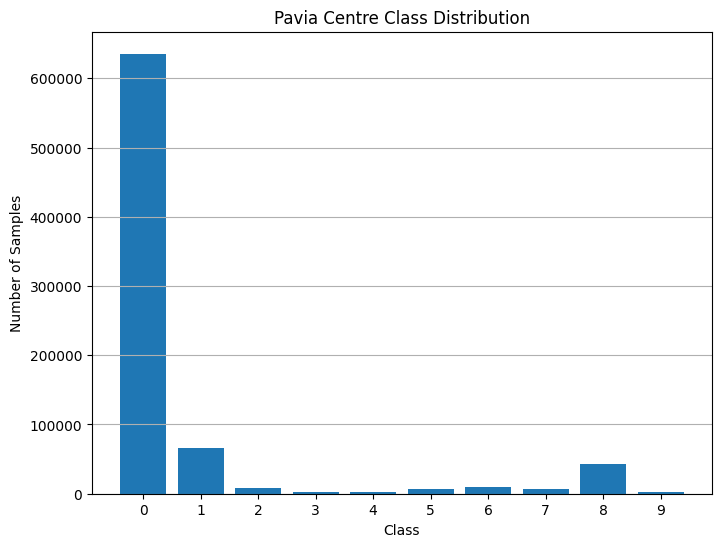

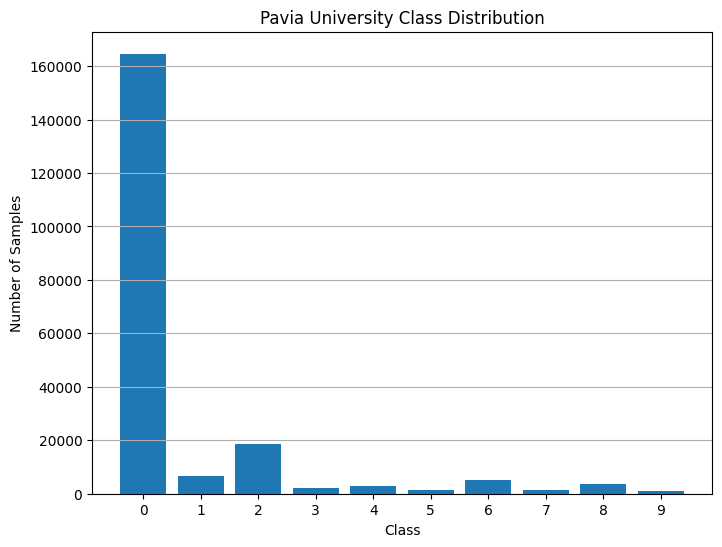

In [79]:
import matplotlib.pyplot as plt

def plot_class_distribution(data, ground_truth, dataset_name):
    # Compute unique classes and their counts
    unique_classes, class_counts = np.unique(ground_truth, return_counts=True)
    
    # Plot class distribution
    plt.figure(figsize=(8, 6))
    plt.bar(unique_classes, class_counts)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title(f'{dataset_name} Class Distribution')
    plt.xticks(unique_classes)
    plt.grid(axis='y')
    plt.show()

for data, ground_truth, name in datasets:
    plot_class_distribution(data, ground_truth, name)

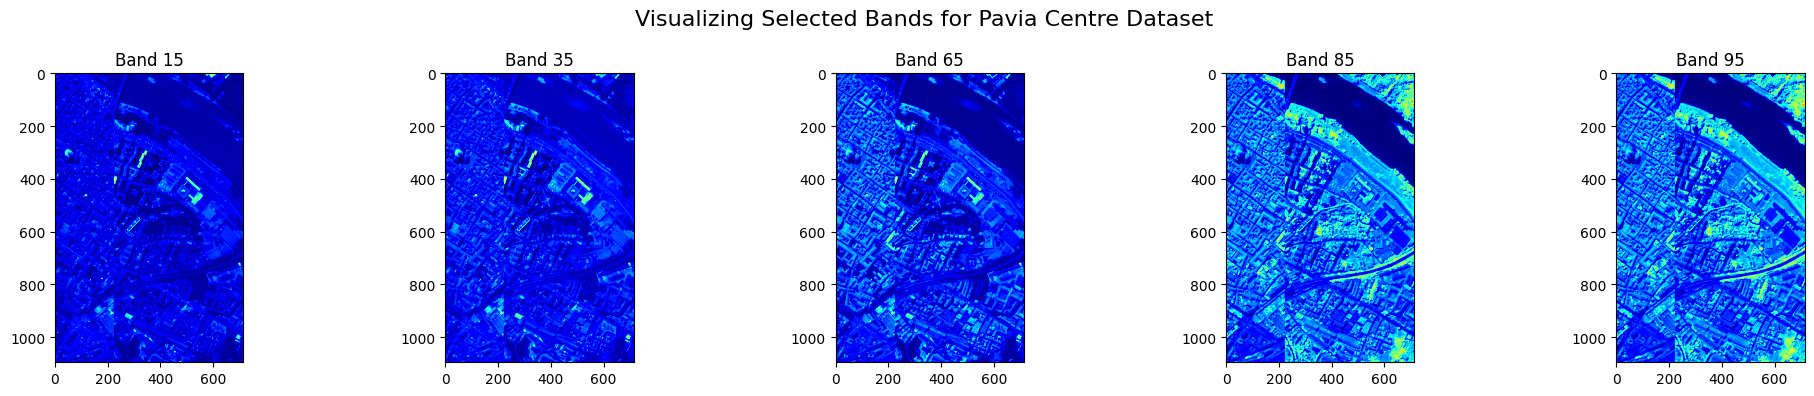

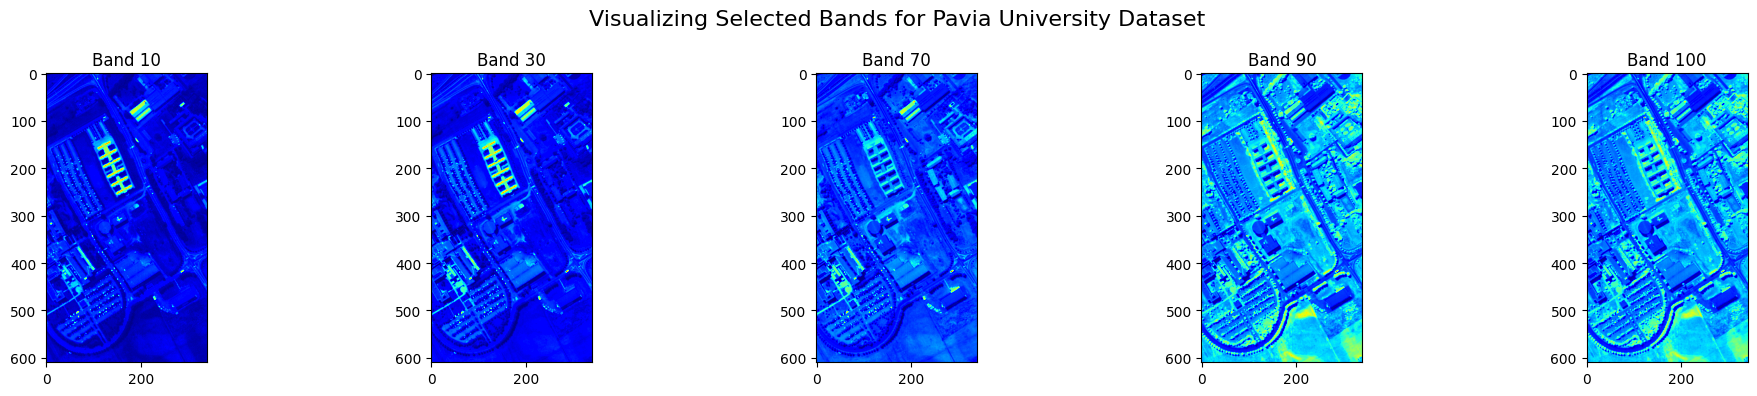

In [80]:
def visualize_selected_bands(dataset_name, dataset, band_indices):
    num_bands_to_visualize = len(band_indices)
    num_plots = num_bands_to_visualize // 5 + (1 if num_bands_to_visualize % 5 != 0 else 0)
    fig, axes = plt.subplots(num_plots, 5, figsize=(20, num_plots * 4))
    fig.suptitle(f'Visualizing Selected Bands for {dataset_name} Dataset', fontsize=16)
    if num_plots == 1:
        axes = [axes]
    for i, band_idx in enumerate(band_indices):
        row_idx = i // 5
        col_idx = i % 5
        axes[row_idx][col_idx].imshow(dataset[:,:,band_idx], cmap='jet')
        axes[row_idx][col_idx].set_title(f'Band {band_idx}')
    plt.tight_layout()
    plt.show()

pavia_centre_selected_bands = [15, 35, 65, 85, 95]
pavia_university_selected_bands = [10, 30, 70, 90, 100]


visualize_selected_bands("Pavia Centre", pavia_centre_data, pavia_centre_selected_bands)

visualize_selected_bands("Pavia University", pavia_university_data, pavia_university_selected_bands)

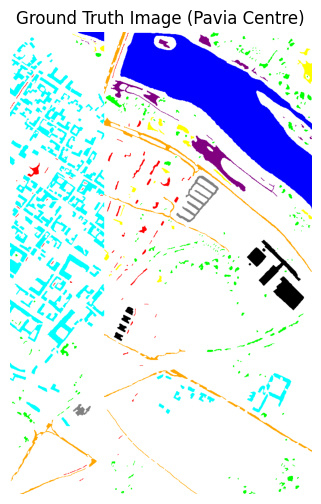

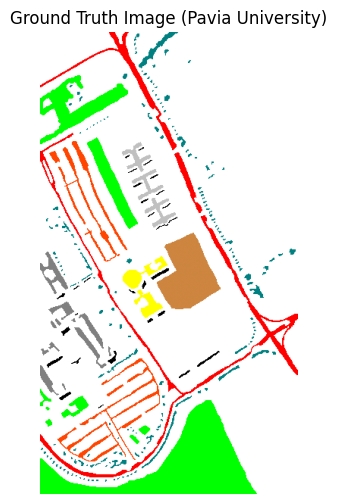

In [82]:
def plot_ground_truth(ground_truth_data, dataset_name):
   
    if dataset_name == "Pavia Centre":
        class_colors = {
            0: [255, 255, 255],     # Unclassified (White)
            1: [0, 0, 255],         # Water (Blue)
            2: [0, 255, 0],         # Trees (Green)
            3: [255, 255, 0],       # Asphalt (Yellow)
            4: [128, 128, 128],     # Self-Blocking Bricks (Gray)
            5: [128, 0, 128],       # Bitumen (Purple)
            6: [255, 165, 0],       # Tiles (Orange)
            7: [0, 0, 0],           # Shadows (Black)
            8: [0, 255, 255],       # Meadows (Cyan)
            9: [255, 0, 0]          # Bare Soil (Red)
        }
    elif dataset_name == "Pavia University":
        class_colors = {
            0: [255, 255, 255],             # Unclassified (White)
            1: [255, 0, 0],                 # Asphalt (Red)
            2: [0, 255, 0],                 # Meadows (Green)
            3: [128, 128, 128],             # Gravel (Gray)
            4: [0, 128, 128],               # Trees (Teal)
            5: [192, 192, 192],             # Painted metal sheets (Silver)
            6: [205, 133, 63],              # Bare Soil (Brown)
            7: [255, 255, 0],               # Bitumen (Yellow)
            8: [255, 69, 0],                # Self-Blocking Bricks (Orange Red)
            9: [0, 0, 0]                    # Shadows (Black)
        }
    else:
        print("Dataset not recognized.")
        return

    y = np.zeros((ground_truth_data.size, 3))
    for i, class_label in enumerate(ground_truth_data.ravel()):
        y[i] = np.array(class_colors.get(class_label, [255, 255, 255])) / 255.

    ground_truth_image = np.reshape(y, (ground_truth_data.shape[0], ground_truth_data.shape[1], 3))
    plt.figure(figsize=(8, 6))
    plt.imshow(ground_truth_image)
    plt.title(f'Ground Truth Image ({dataset_name})')
    plt.axis('off')
    plt.show()


for dataset, ground_truth, dataset_name in datasets:
    plot_ground_truth(ground_truth, dataset_name)

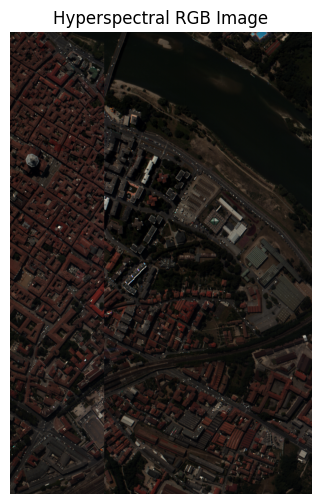

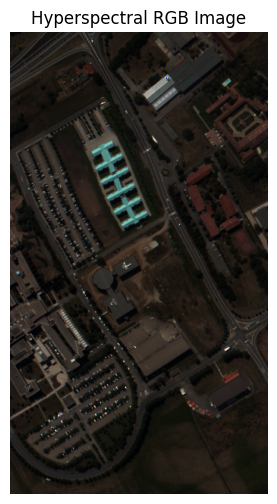

In [84]:
# Function to process hyperspectral image data and plot the RGB image
def plot_hyperspectral_rgb(hyperspectral_data):
    data = hyperspectral_data / 8000.
    blue = data[:, :, 10]  # blue band
    green = data[:, :, 24]  # green band
    red = data[:, :, 44]  # red band
    rgb_hsi = np.zeros((data.shape[0], data.shape[1], 3))
    rgb_hsi[:, :, 0] = red
    rgb_hsi[:, :, 1] = green
    rgb_hsi[:, :, 2] = blue
    # Normalize pixel values to [0, 1] range
    rgb_hsi = np.clip(rgb_hsi, 0, 1)
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb_hsi)
    plt.title('Hyperspectral RGB Image')
    plt.axis('off')
    plt.show()

# Process and plot the hyperspectral RGB image for each dataset
for hyperspectral_data in [pavia_centre_data, pavia_university_data]:
    plot_hyperspectral_rgb(hyperspectral_data)

### Normalization

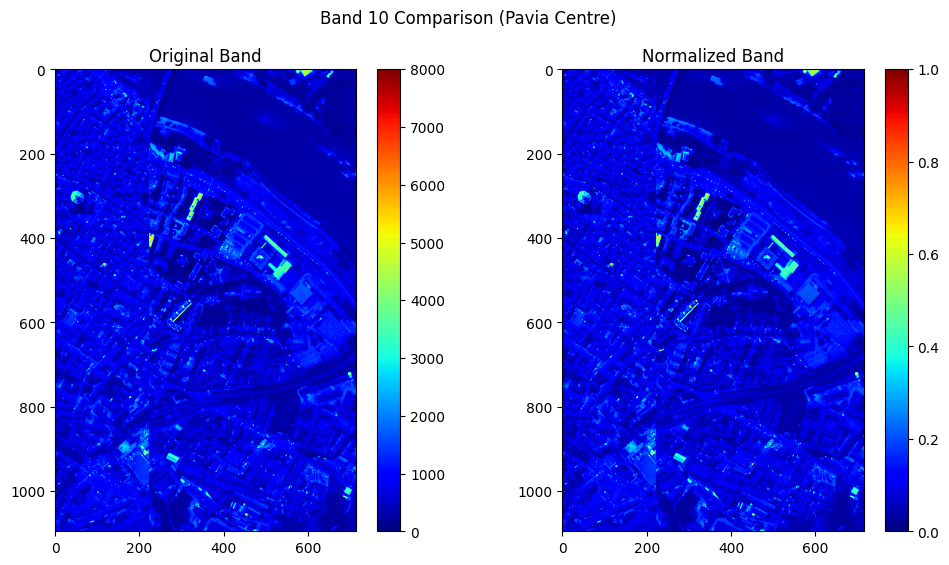

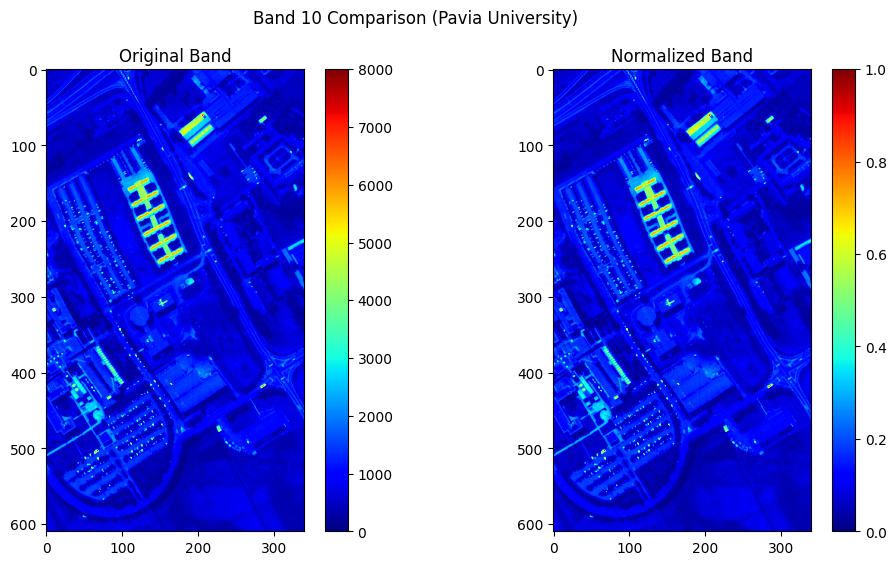

In [85]:
# Normaliza data
def normalize_data(raw_data):
    max_value = np.max(raw_data)
    min_value = np.min(raw_data)
    normalized_data = (raw_data - min_value) / (max_value - min_value)
    return normalized_data

pavia_centre_normalized = normalize_data(pavia_centre_data)
pavia_university_normalized = normalize_data(pavia_university_data)


def plot_band_comparison(original_data, normalized_data, band_idx, dataset_name):
    original_band = original_data[:, :, band_idx]
    normalized_band = normalized_data[:, :, band_idx]

    plt.figure(figsize=(12, 6))

    # Original data
    plt.subplot(1, 2, 1)
    plt.imshow(original_band, cmap='jet')
    plt.title('Original Band')
    plt.colorbar()

    # Normalized data
    plt.subplot(1, 2, 2)
    plt.imshow(normalized_band, cmap='jet')
    plt.title('Normalized Band')
    plt.colorbar()

    plt.suptitle(f'Band {band_idx} Comparison ({dataset_name})')
    plt.show()

plot_band_comparison(pavia_centre_data, pavia_centre_normalized, 10, "Pavia Centre")
plot_band_comparison(pavia_university_data, pavia_university_normalized, 10, "Pavia University")

### Getting the centre part of the datasets

In [49]:
def crop_center_hsi(hsi_data,label_data, crop_height, crop_width):
    """
    Crop the center part of an HSI dataset.
    
    Parameters:
        hsi_data (np.array): Hyperspectral image with shape (height, width, bands).
        crop_height (int): Desired crop height.
        crop_width (int): Desired crop width.
        
    Returns:
        np.array: Central cropped HSI of shape (crop_height, crop_width, bands).
    """
    h, w, bands = hsi_data.shape
    start_row = (h - crop_height) // 2
    start_col = (w - crop_width) // 2
    cropped_data =  hsi_data[start_row:start_row + crop_height, start_col:start_col + crop_width, :]
        # Crop label data
    cropped_labels = label_data[start_row:start_row + crop_height, start_col:start_col + crop_width]
    return cropped_data,cropped_labels



# Ensure crop size fits within both images
crop_height = min(pavia_university_data.shape[0], pavia_centre_data.shape[0])
crop_width = min(pavia_university_data.shape[1], pavia_centre_data.shape[1])

# Crop the central parts
paviaU_data,paviaU_labels = crop_center_hsi(pavia_university_data,pavia_university_gt, crop_height, crop_width)
paviaC_data,paviaC_labels = crop_center_hsi(pavia_centre_data,pavia_centre_gt, crop_height, crop_width)

# Adjust the bands in both datasets
paviaU_data = paviaU_data[:,:,:102]




# Normalize the cropped data

paviaU_data = normalize_data(paviaU_data)
paviaC_data = normalize_data(paviaC_data)

In [50]:
# Reshape the data for 1D CNN
def reshape_data(data):
    height, width, num_bands = data.shape
    # -1 here infers that numpy calculates that dimension automatically based on no of elements
    return data.reshape(-1, num_bands, 1)  # Shape: (num_samples, num_bands, 1)

paviaU_data = reshape_data(paviaU_data)
paviaC_data = reshape_data(paviaC_data)

paviaU_labels = paviaU_labels.flatten()
paviaC_labels = paviaC_labels.flatten()

### Test train split

In [51]:
from sklearn.model_selection import train_test_split

(paviaU_data,PU_test,paviaU_labels,PU_test_labels) = train_test_split(paviaU_data,paviaU_labels,test_size=0.2)
(paviaC_data,PC_test,paviaC_labels,PC_test_labels) = train_test_split(paviaC_data,paviaC_labels,test_size=0.2)

In [53]:
# Plotter for plotting loss

import time 
from IPython import display as ipythondisplay

class PeriodicPlotter:
  def __init__(self, sec, xlabel='', ylabel='', scale=None):

    self.xlabel = xlabel
    self.ylabel = ylabel
    self.sec = sec
    self.scale = scale

    self.tic = time.time()

  def plot(self, data):
    if time.time() - self.tic > self.sec:
      plt.cla()

      if self.scale is None:
        plt.plot(data)
      elif self.scale == 'semilogx':
        plt.semilogx(data)
      elif self.scale == 'semilogy':
        plt.semilogy(data)
      elif self.scale == 'loglog':
        plt.loglog(data)
      else:
        raise ValueError("unrecognized parameter scale {}".format(self.scale))

      plt.xlabel(self.xlabel); plt.ylabel(self.ylabel)
      ipythondisplay.clear_output(wait=True)
      ipythondisplay.display(plt.gcf())

      self.tic = time.time()


## DAAN Component

In [54]:
def feature_extractor(input_shape):
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        # Add BatchNormalization
        tf.keras.layers.Conv1D(16, kernel_size=7, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling1D(2),
        
        tf.keras.layers.Conv1D(32, kernel_size=5, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling1D(2),
        
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.GlobalAveragePooling1D(),
        
        tf.keras.layers.Dropout(0.3)  # Add dropout for regularization
    ])
    
def bottleneck_layer(input_shape):
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu')
    ])
    
def classifier(input_shape):
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
def domain_discriminator(input_shape):
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
# Define MMD Loss
def mmd_loss(source_features, target_features):
    source_mean = tf.reduce_mean(source_features, axis=0)
    target_mean = tf.reduce_mean(target_features, axis=0)
    return tf.reduce_sum(tf.square(source_mean - target_mean))

# Define CORAL Loss
def coral_loss(source_features, target_features):
    source_cov = tf.matmul(tf.transpose(source_features), source_features) / tf.cast(tf.shape(source_features)[0] - 1, tf.float32)
    target_cov = tf.matmul(tf.transpose(target_features), target_features) / tf.cast(tf.shape(target_features)[0] - 1, tf.float32)
    d = tf.shape(source_features)[1]
    return tf.reduce_sum(tf.square(source_cov - target_cov)) / (4 * tf.cast(d, tf.float32)) 

# DAAN Model with Bottleneck Layer and Domain Adaptation Layer
class DAANModel(tf.keras.Model):
    def __init__(self, feature_extractor, bottleneck_layer, classifier, domain_discriminator):
        super(DAANModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.bottleneck_layer = bottleneck_layer
        self.classifier = classifier
        self.domain_discriminator = domain_discriminator

    def call(self, source_data, target_data, training=False):
        # Feature extraction
        source_features = self.feature_extractor(source_data, training=training)
        target_features = self.feature_extractor(target_data, training=training)
        
        # Bottleneck adaptation
        source_bottleneck = self.bottleneck_layer(source_features, training=training)
        target_bottleneck = self.bottleneck_layer(target_features, training=training)
        
        # Classification for source
        source_logits = self.classifier(source_bottleneck)
        
        # Domain discrimination for both source and target
        source_domain_logits = self.domain_discriminator(source_bottleneck)
        target_domain_logits = self.domain_discriminator(target_bottleneck)
        
        return source_logits, source_domain_logits, target_domain_logits, source_bottleneck, target_bottleneck                

### Train DAAN 

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
batch_size = 128
learning_rate = 0.001
alpha_mmd = 0.1
alpha_coral = 0.1
lambda_adv = 0.04
iterations = 2000  # Set a fixed number of iterations

# Instantiate Components
input_shape = paviaU_data.shape[1:]  # shape based on PaviaU dataset
feature_extractor_model = feature_extractor(input_shape)
bottleneck_model = bottleneck_layer(feature_extractor_model.output_shape[1:])
classifier_model = classifier(bottleneck_model.output_shape[1:])
domain_discriminator_model = domain_discriminator(bottleneck_model.output_shape[1:])

# DAAN Model
daan_model = DAANModel(feature_extractor_model, bottleneck_model, classifier_model, domain_discriminator_model)

# Instantiate Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Custom Training Step for DAAN
def train_step(daan_model, source_data, source_labels, target_data, alpha_mmd, alpha_coral, lambda_adv, optimizer):
    with tf.GradientTape() as tape:
        # Forward pass
        source_logits, source_domain_logits, target_domain_logits, source_bottleneck, target_bottleneck = daan_model(source_data, target_data, training=True)

        # Classification loss (source only)
        classification_loss = tf.keras.losses.SparseCategoricalCrossentropy()(source_labels, source_logits)

        # Domain adaptation losses
        mmd_loss_value = mmd_loss(source_bottleneck, target_bottleneck)
        coral_loss_value = coral_loss(source_bottleneck, target_bottleneck)
        
        # Adversarial loss
        source_domain_labels = tf.zeros((tf.shape(source_data)[0],), dtype=tf.int32)
        target_domain_labels = tf.ones((tf.shape(target_data)[0],), dtype=tf.int32)
        domain_labels = tf.concat([source_domain_labels, target_domain_labels], axis=0)
        domain_logits = tf.concat([source_domain_logits, target_domain_logits], axis=0)
        adversarial_loss = tf.keras.losses.SparseCategoricalCrossentropy()(domain_labels, domain_logits)

        # Total loss
        total_loss = classification_loss + alpha_mmd * mmd_loss_value + alpha_coral * coral_loss_value - lambda_adv * adversarial_loss

    # Compute gradients and apply
    gradients = tape.gradient(total_loss, daan_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, daan_model.trainable_variables))

    return total_loss, classification_loss, mmd_loss_value, coral_loss_value, adversarial_loss





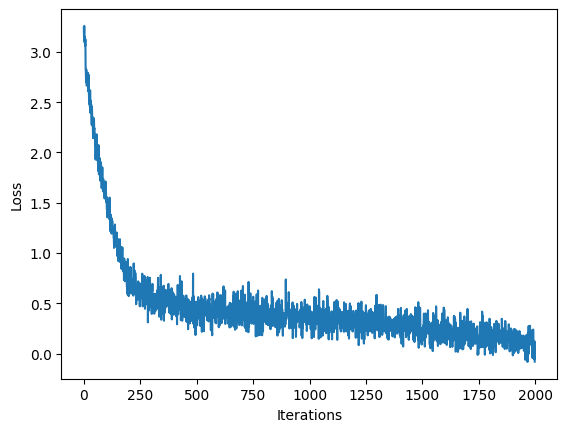

100%|██████████| 2000/2000 [10:37<00:00,  3.14it/s]

Iteration 2000, Total Loss: 0.1407, Classification Loss: 0.5391, MMD Loss: 0.2317, CORAL Loss: 0.0556, Adversarial Loss: 10.6783


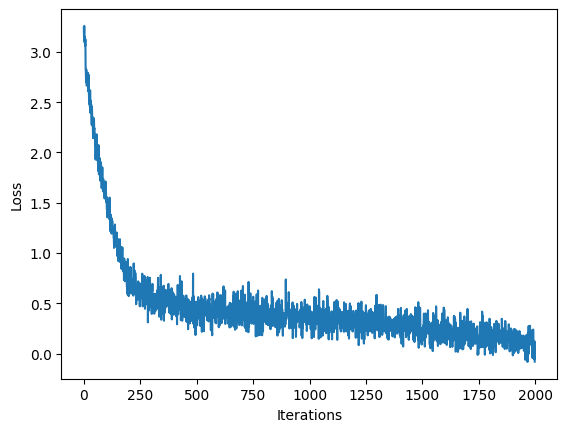

In [56]:
# List to store losses for plotting
losses = []
plotter = PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

# Training Loop with Fixed Iterations
for iteration in tqdm(range(iterations)):
    # Randomly sample a batch from the source and target datasets
    indices_source = np.random.choice(len(paviaU_data), batch_size, replace=False)
    indices_target = np.random.choice(len(paviaC_data), batch_size, replace=False)
    
    source_batch = paviaU_data[indices_source]
    source_labels_batch = paviaU_labels[indices_source]
    target_batch = paviaC_data[indices_target]

    # Perform a training step on the random batch
    total_loss, classification_loss, mmd_loss_value, coral_loss_value, adversarial_loss = train_step(
        daan_model, source_batch, source_labels_batch, target_batch, alpha_mmd, alpha_coral, lambda_adv, optimizer
    )
    
    # Store total loss for plotting
    losses.append(total_loss.numpy())
    plotter.plot(losses)

    # Print loss every 100 iterations for monitoring
    if (iteration + 1) % 100 == 0:
        print(f"Iteration {iteration + 1}, Total Loss: {total_loss:.4f}, Classification Loss: {classification_loss:.4f}, "
              f"MMD Loss: {mmd_loss_value:.4f}, CORAL Loss: {coral_loss_value:.4f}, Adversarial Loss: {adversarial_loss:.4f}")

## CABN Component

In [57]:
source_features = daan_model.feature_extractor(paviaU_data)
target_features = daan_model.feature_extractor(paviaC_data)

source_features = daan_model.bottleneck_layer(source_features)
target_features = daan_model.bottleneck_layer(target_features)

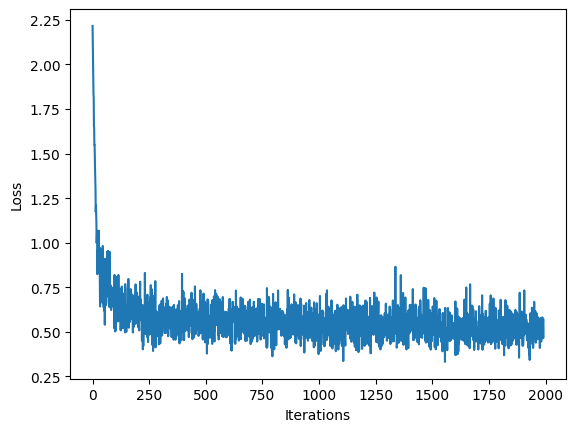

100%|██████████| 2000/2000 [02:30<00:00, 13.30it/s]


Iteration 2000, Total Loss: 0.53692227602005,Classification Loss: 0.5369222164154053, CMMD Loss: 5.192537599896241e-08


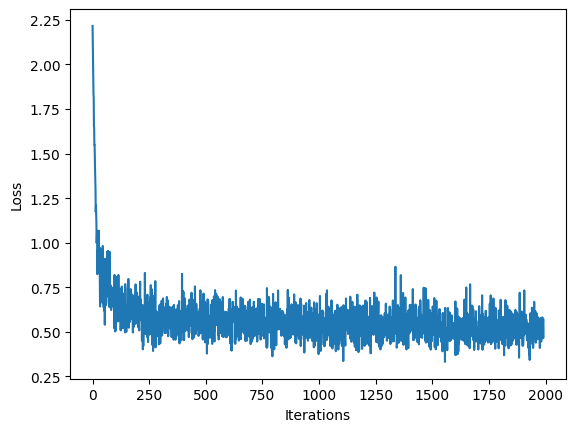

In [60]:
# Define the Auxiliary Classifier model
class AuxiliaryClassifier(tf.keras.Model):
    def __init__(self, input_dim, num_classes):
        super(AuxiliaryClassifier, self).__init__()
        # Define the first dense layer with 128 units and ReLU activation
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        # Define the output layer with the number of classes, using softmax activation for classification
        self.output_layer = tf.keras.layers.Dense(num_classes, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.01))

    def call(self, x):
        # Pass input through the first dense layer
        x = self.dense1(x)
        # Final output layer, producing probability distribution for each class
        return self.output_layer(x)

def conditional_mmd_loss(Xs, Xt, Ys, Yt, sigma=1.0):
    num_classes = Ys.shape[1]
    mmd_loss = 0.0

    # Calculate class weights based on source label distribution
    class_counts = tf.reduce_sum(Ys, axis=0) + 1e-5  # Avoid division by zero
    class_weights = 1.0 / class_counts
    
    # Ensure class_weights are float32
    class_weights = tf.cast(class_weights, tf.float32)

    for i in range(num_classes):
        Xs_i = tf.boolean_mask(Xs, Ys[:, i] == 1)
        Xt_i = tf.boolean_mask(Xt, Yt[:, i] == 1)
        
        # Ensure the input tensors are in float32
        Xs_i = tf.cast(Xs_i, tf.float32)
        Xt_i = tf.cast(Xt_i, tf.float32)

        if tf.size(Xs_i) == 0 or tf.size(Xt_i) == 0:
            continue

        K_ss = rbf_kernel(Xs_i, Xs_i, sigma)
        K_tt = rbf_kernel(Xt_i, Xt_i, sigma)
        K_st = rbf_kernel(Xs_i, Xt_i, sigma)
        
        # Ensure all kernel results are float32
        K_ss = tf.cast(K_ss, tf.float32)
        K_tt = tf.cast(K_tt, tf.float32)
        K_st = tf.cast(K_st, tf.float32)

        # Compute MMD for class i
        mmd_i = tf.reduce_mean(K_ss) + tf.reduce_mean(K_tt) - 2 * tf.reduce_mean(K_st)

        # Ensure mmd_i is float32
        mmd_i = tf.cast(mmd_i, tf.float32)
        mmd_loss += class_weights[i] * mmd_i

    return mmd_loss / tf.reduce_sum(class_weights)


def rbf_kernel(x1, x2, sigma=1.0):
# Reshape x1 and x2 to make them compatible for broadcasting
    x1_exp = tf.expand_dims(x1, 1)  # Shape: [batch_size, 1, features]
    x2_exp = tf.expand_dims(x2, 0)  # Shape: [1, batch_size, features]
    
    # Compute squared Euclidean distance (pairwise)
    dist = tf.reduce_sum(tf.square(x1_exp - x2_exp), axis=-1)  # Shape: [batch_size, batch_size]
    
    # Compute the RBF kernel
    return tf.cast(tf.exp(-dist / (2 * sigma ** 2)), tf.float32)


# Define input datasets (source and target domain features and labels)
Xs = source_features  # Source domain features
Xt = target_features  # Target domain features
Ys = paviaU_labels    # Source domain labels (assuming you have the actual source labels)
Ys = tf.keras.utils.to_categorical(Ys, num_classes=10)  # Convert source labels to one-hot encoding
batch_size = 128

input_dim = Xs.shape[1]  # Get the number of features in the source domain (Xs)
num_classes = Ys.shape[1] 
# Define optimizer for the auxiliary classifier
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)



num_iterations = 2000


# Train the auxiliary classifier on the source domain data (Xs, Ys)
aux_classifier = AuxiliaryClassifier(input_dim=input_dim, num_classes=num_classes)

# List to store losses for plotting
losses = []
plotter = PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

# Training loop
for iteration in tqdm(range(num_iterations)):
    # Generate random indices for source and target batches    
    idx = np.random.choice(Xs.shape[0], batch_size, replace=False)

    Xs_batch = tf.gather(Xs, idx)
    Xt_batch = tf.gather(Xt, idx)
    Ys_batch = tf.gather(Ys, idx)

    with tf.GradientTape() as tape:
        
        # Forward pass for target samples to obtain predictions
        Xs_logits = aux_classifier(Xs_batch)
        Xt_logits = aux_classifier(Xt_batch)
        Yt_preds = tf.argmax(Xt_logits, axis=1)  # Use predictions as pseudo-labels
        Yt_batch = tf.one_hot(Yt_preds, depth=num_classes)

        # Compute source classification loss (cross-entropy on labeled source samples)
        source_loss = tf.keras.losses.categorical_crossentropy(Ys_batch, Xs_logits)
        
        # Compute Conditional MMD loss between source and target logits
        cmmd_loss = conditional_mmd_loss(Xs_logits, Xt_logits, Ys_batch, Yt_batch)

        # Combine source classification and Conditional MMD loss
        total_loss = tf.reduce_mean(source_loss) + tf.cast(cmmd_loss, tf.float32)

    # Apply gradients to the auxiliary classifier
    gradients = tape.gradient(total_loss, aux_classifier.trainable_variables)
    optimizer.apply_gradients(zip(gradients, aux_classifier.trainable_variables))
    losses.append(tf.reduce_mean(total_loss).numpy())
    plotter.plot(losses)

    # Print the loss every 100 iterations
    if (iteration + 1) % 100 == 0:
        print(f"Iteration {iteration + 1}, Total Loss: {tf.reduce_mean(total_loss).numpy()},Classification Loss: {tf.reduce_mean(source_loss).numpy()}, CMMD Loss: {tf.reduce_mean(cmmd_loss).numpy()}")

## Test


### DAAN

In [75]:
paviaU_test_data = PU_test
paviaU_test_labels = PU_test_labels
paviaC_test_data = PC_test

# Custom Test Step for DAAN
def test_step(daan_model, source_data, source_labels, target_data, alpha_mmd, alpha_coral, lambda_adv):
    # Forward pass (no gradient tracking)
    source_logits, source_domain_logits, target_domain_logits, source_bottleneck, target_bottleneck = daan_model(source_data, target_data, training=False)

    # Classification loss (source only)
    classification_loss = tf.keras.losses.SparseCategoricalCrossentropy()(source_labels, source_logits)

    # Domain adaptation losses
    mmd_loss_value = mmd_loss(source_bottleneck, target_bottleneck)
    coral_loss_value = coral_loss(source_bottleneck, target_bottleneck)
    
    # Adversarial loss
    source_domain_labels = tf.zeros((tf.shape(source_data)[0],), dtype=tf.int32)
    target_domain_labels = tf.ones((tf.shape(target_data)[0],), dtype=tf.int32)
    domain_labels = tf.concat([source_domain_labels, target_domain_labels], axis=0)
    domain_logits = tf.concat([source_domain_logits, target_domain_logits], axis=0)
    adversarial_loss = tf.keras.losses.SparseCategoricalCrossentropy()(domain_labels, domain_logits)

    # Total loss
    total_loss = classification_loss + alpha_mmd * mmd_loss_value + alpha_coral * coral_loss_value - lambda_adv * adversarial_loss

    return total_loss, classification_loss, mmd_loss_value, coral_loss_value, adversarial_loss

# Initialize lists to store test losses
test_losses = []
test_classification_losses = []
test_mmd_losses = []
test_coral_losses = []
test_adversarial_losses = []

# Number of test batches (adjust this depending on your test set size)
num_test_batches = len(paviaU_test_data) // batch_size

# Disable gradient calculation for testing
for batch_idx in range(num_test_batches):
    # Randomly sample a batch from the test datasets
    indices_source = np.random.choice(len(paviaU_test_data), batch_size, replace=False)
    indices_target = np.random.choice(len(paviaC_test_data), batch_size, replace=False)
    
    source_batch = paviaU_test_data[indices_source]
    source_labels_batch = paviaU_test_labels[indices_source]
    target_batch = paviaC_test_data[indices_target]

    # Perform a forward pass through the model
    total_loss, classification_loss, mmd_loss_value, coral_loss_value, adversarial_loss = test_step(
        daan_model, source_batch, source_labels_batch, target_batch, alpha_mmd, alpha_coral, lambda_adv
    )

    # Store the losses for later analysis or plotting
    test_losses.append(total_loss.numpy())
    test_classification_losses.append(classification_loss.numpy())
    test_mmd_losses.append(mmd_loss_value.numpy())
    test_coral_losses.append(coral_loss_value.numpy())
    test_adversarial_losses.append(adversarial_loss.numpy())

# Compute the average test losses
average_test_loss = np.mean(test_losses)
average_classification_loss = np.mean(test_classification_losses)
average_mmd_loss = np.mean(test_mmd_losses)
average_coral_loss = np.mean(test_coral_losses)
average_adversarial_loss = np.mean(test_adversarial_losses)

# Print the final test losses
print(f"Test Loss: {average_test_loss:.4f}")
print(f"Test Classification Loss: {average_classification_loss:.4f}")
print(f"Test MMD Loss: {average_mmd_loss:.4f}")
print(f"Test CORAL Loss: {average_coral_loss:.4f}")
print(f"Test Adversarial Loss: {average_adversarial_loss:.4f}")



Test Loss: 0.5315
Test Classification Loss: 0.7533
Test MMD Loss: 1.2611
Test CORAL Loss: 0.1211
Test Adversarial Loss: 8.9999


### CABN

In [ ]:
test_target_features = daan_model.feature_extractor(PC_test)
test_target_features = daan_model.bottleneck_layer(test_target_features)

test_source_features = daan_model.feature_extractor(PU_test)
test_source_features = daan_model.bottleneck_layer(test_source_features)


In [67]:
# Assuming you have the test data (Xs_test, Xt_test, Ys_test, Yt_test)
Xs_test = test_source_features
Xt_test = test_target_features
Ys_test = PU_test_labels
Ys_test = tf.keras.utils.to_categorical(Ys_test, num_classes=10)



# Test loop (no gradient calculation during testing)
test_loss = 0.0
test_source_loss = 0.0
test_cmmd_loss = 0.0
num_test_batches = Xs_test.shape[0] // batch_size  # Number of test batches

# Set the model to evaluation mode (for dropout and batch norm, though not strictly necessary in your case)
#aux_classifier.eval()

# Disable gradient calculation for testing
for batch_idx in range(num_test_batches):
    # Get the current batch
    idx = np.random.choice(Xs_test.shape[0], batch_size, replace=False)
    
    Xs_batch = tf.gather(Xs_test, idx)
    Xt_batch = tf.gather(Xt_test, idx)
    Ys_batch = tf.gather(Ys_test, idx)

    # Forward pass through the model
    Xs_logits = aux_classifier(Xs_batch)
    Xt_logits = aux_classifier(Xt_batch)
    Yt_preds = tf.argmax(Xt_logits, axis=1)  # Predictions as pseudo-labels
    Yt_batch = tf.one_hot(Yt_preds, depth=num_classes)

    # Compute the source classification loss (cross-entropy on labeled source samples)
    source_loss = tf.keras.losses.categorical_crossentropy(Ys_batch, Xs_logits)

    # Compute Conditional MMD loss between source and target logits
    cmmd_loss = conditional_mmd_loss(Xs_logits, Xt_logits, Ys_batch, Yt_batch)

    # Total test loss (sum of source loss and CMMD loss)
    total_loss = tf.reduce_mean(source_loss) + tf.cast(cmmd_loss, tf.float32)

    # Accumulate the losses
    test_loss += tf.reduce_mean(total_loss).numpy()
    test_source_loss += tf.reduce_mean(source_loss).numpy()
    test_cmmd_loss += tf.reduce_mean(cmmd_loss).numpy()

# Calculate average test loss
test_loss /= num_test_batches
test_source_loss /= num_test_batches
test_cmmd_loss /= num_test_batches

# Print final test losses
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Classification Loss: {test_source_loss:.4f}")
print(f"Test CMMD Loss: {test_cmmd_loss:.4f}")


Test Loss: 0.5307
Test Classification Loss: 0.5298
Test CMMD Loss: 0.0009


### Final accuracy for test data

In [86]:
from sklearn.metrics import accuracy_score

target_features = daan_model.feature_extractor(PC_test)
target_features = daan_model.bottleneck_layer(target_features)
Yt_preds = aux_classifier(target_features)
Yt_preds = tf.argmax(Yt_preds,axis=1)

accuracy = accuracy_score(PC_test_labels, Yt_preds)

print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.88715
